Vehicle Price Prediction

In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
details = pd.read_csv("car.csv")
details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
print('Rows and Columns in the database:', details.shape)

Rows and Columns in the database: (4340, 8)


In [11]:
df = details
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
df.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [14]:
df.count()#check for non null values

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

In [15]:
df.drop_duplicates()#drop missing values if available

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [16]:
df.isnull().sum() #check if there are any missing values in th database

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [17]:
df = df.dropna()#drops the rows with missing values if they exist

In [18]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#code to remove its unit and just keep the numerical values
#df["mileage"] = df["mileage"].str.split(" ",expand = True)[0]
#df["mileage"] = df["mileage"].astype("float") # this keeps the datatype of the values unchanged

Feature Creation: for enhancing the insights of the data

In [20]:
current_year = 2023
df["Age_of_car"] = current_year - df["year"] #add new column in dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age_of_car
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


Dropping irrelevant Column

In [23]:
df.drop(["name","year"],axis = 1, inplace = True) #axis 1 describes columns , axis 0 describes rows

In [24]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age_of_car
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


Renaming the columns

In [34]:
df.rename(columns={'selling_price': 'price', 'km_driven' : 'kms','seller_type':'seller'},inplace=True)

In [35]:
df.head()

,price,kms,fuel,seller,transmission,owner,Age_of_car
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


Handling Outliers

In [26]:
df.loc[:, df.dtypes != "object"] # shows all nmerical values in the database

,selling_price,km_driven,Age_of_car
0,60000,70000,16
1,135000,50000,16
2,600000,100000,11
3,250000,46000,6
4,450000,141000,9
...,...,...,...
4335,409999,80000,9
4336,409999,80000,9
4337,110000,83000,14
4338,865000,90000,7


<Axes: xlabel='price'>

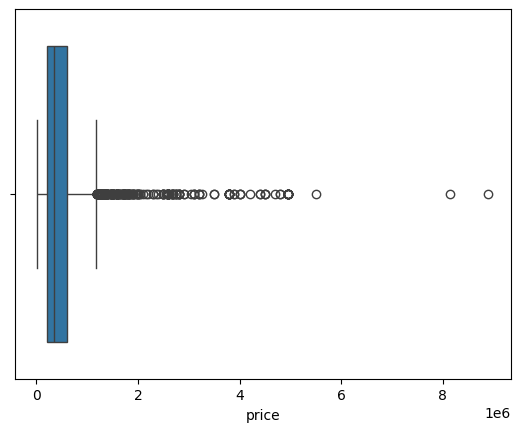

In [36]:
#box plot
sns.boxplot(x=df["price"])

<Axes: >

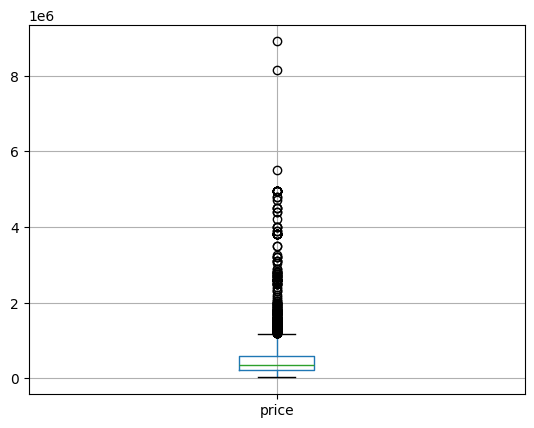

In [37]:
df.boxplot(column=["price"])

<Axes: xlabel='Age_of_car'>

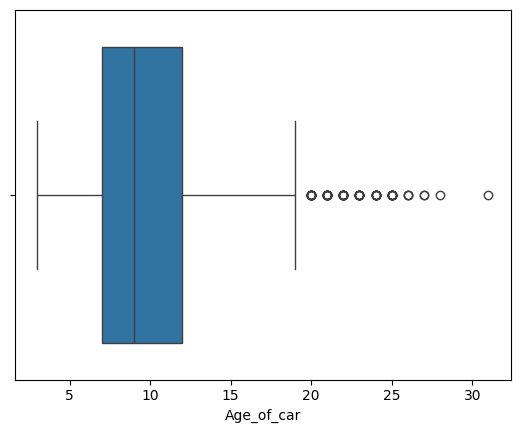

In [38]:
sns.boxplot(x=df["Age_of_car"])

Remove Outliers = loss of data

In [39]:
#set the upper and lower limit for the outliers
upper_limit = df["Age_of_car"].quantile(0.95)
lower_limit = df["Age_of_car"].quantile(0.05)
df.loc[(df["Age_of_car"]>upper_limit),"Age_of_car"] = upper_limit
df.loc[(df["Age_of_car"]<lower_limit),"Age_of_car"] = lower_limit

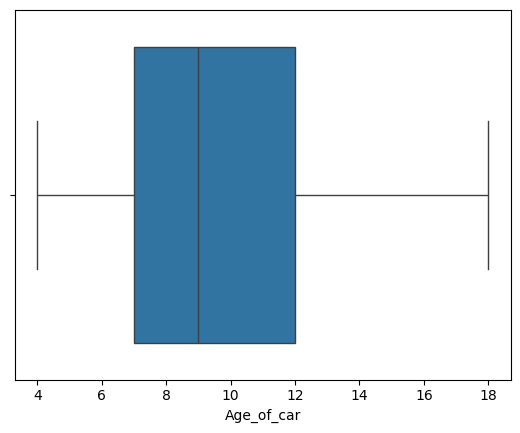

In [40]:
sns.boxplot(x=df["Age_of_car"])
plt.show()

In [41]:
df.count()

price           4340
kms             4340
fuel            4340
seller          4340
transmission    4340
owner           4340
Age_of_car      4340
dtype: int64

<Axes: xlabel='price'>

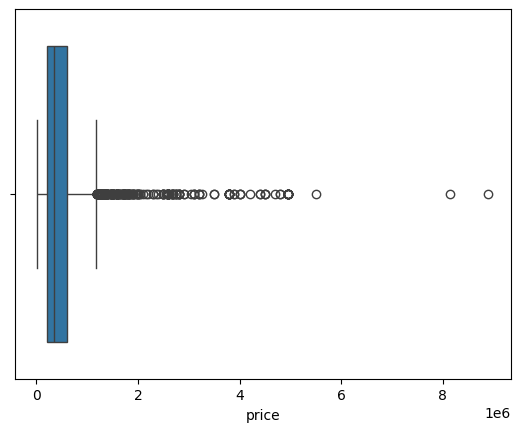

In [44]:
sns.boxplot(x=df["price"])

In [51]:
upper_lim = df["price"].quantile(0.95)
lower_lim = df["price"].quantile(0.05)
df.loc[(df["price"]>upper_lim),"price"] = upper_lim
df.loc[(df["price"]<lower_lim),"price"] = lower_lim

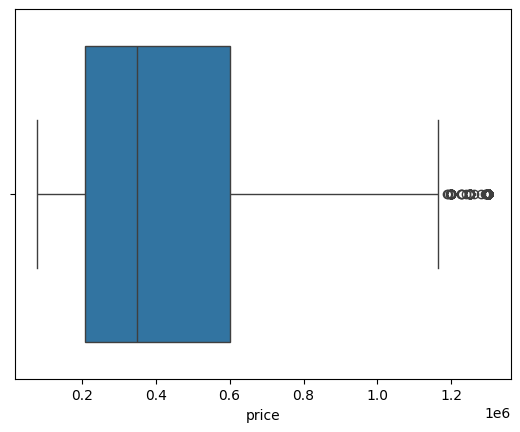

In [52]:
sns.boxplot(x=df["price"])
plt.show()

<Axes: xlabel='kms'>

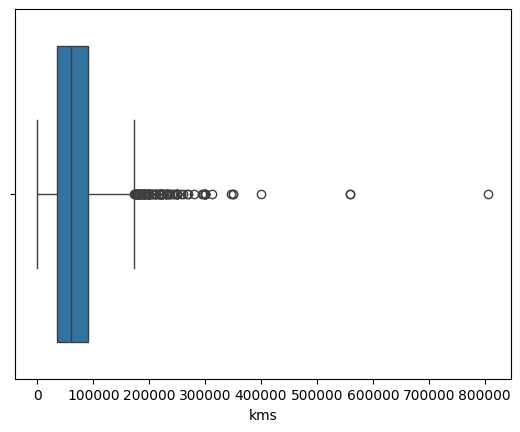

In [53]:
sns.boxplot(x=df["kms"])

In [55]:
# if there are very large outliers method 2
factor = 3
upper = df["kms"].mean() + df["kms"].std() * factor
lower = df["kms"].mean() - df["kms"].std() * factor

In [56]:
df = df[(df["kms"]<upper) & (df["kms"]>lower)]

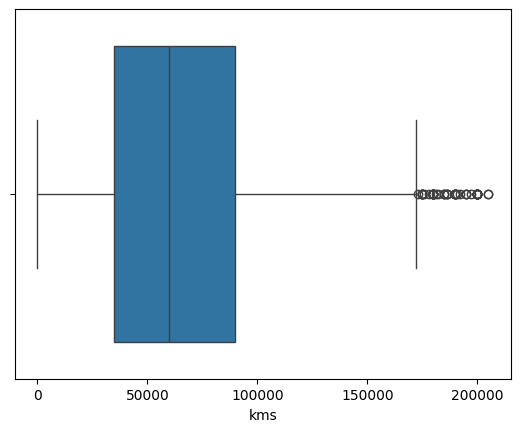

In [57]:
sns.boxplot(x=df["kms"])
plt.show()

Inter Quartile Range

Removing outliers using IQR Method 3 
q1 = df["column_name"].quantile(0.25)
q3 = df["column name"].quantile(0.75)
IQR = q3 - q1
lower_boundary = q1 - (1.5 * IQR)
upper_boundary = q3 + (1.5 * IQR)

df = df[((df["column name"]<lower_boundary>) | (df["column name"] > upper_boundary))]


In [59]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339],
      dtype='int64', length=4285)

In [60]:
df.reset_index(inplace=True, drop= True)

In [61]:
df.head()

,price,kms,fuel,seller,transmission,owner,Age_of_car
0,80000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


Visualization Techniques

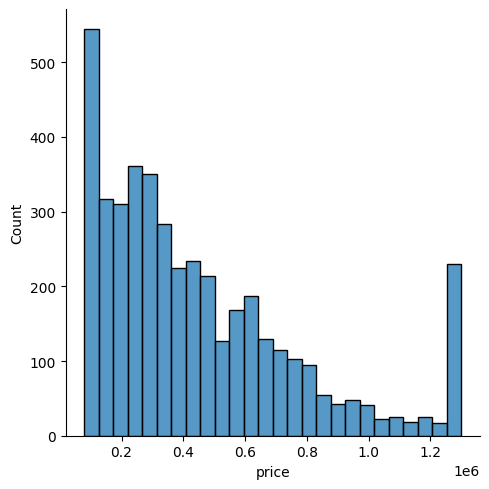

In [62]:
sns.displot(df["price"]) #histogram plot - data distribution plot
plt.show()


In [63]:
num_col = list(df.loc[:,df.dtypes != "object"].columns) #all columns with numerical values
num_col

['price', 'kms', 'Age_of_car']

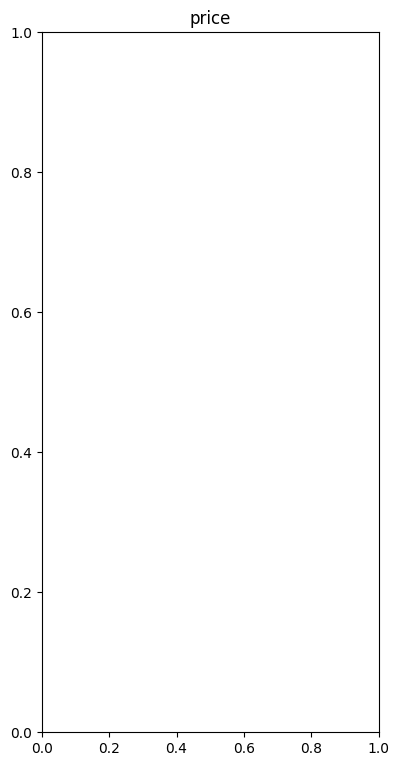

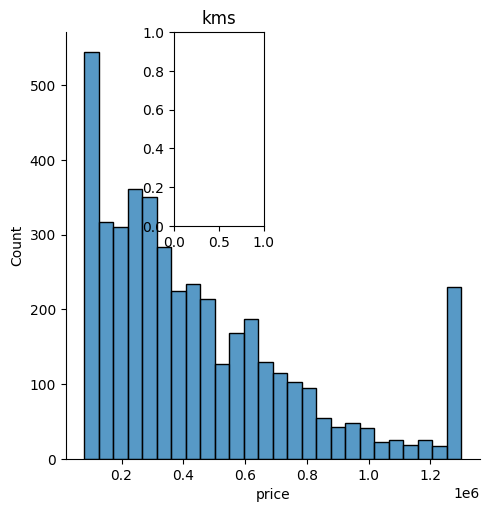

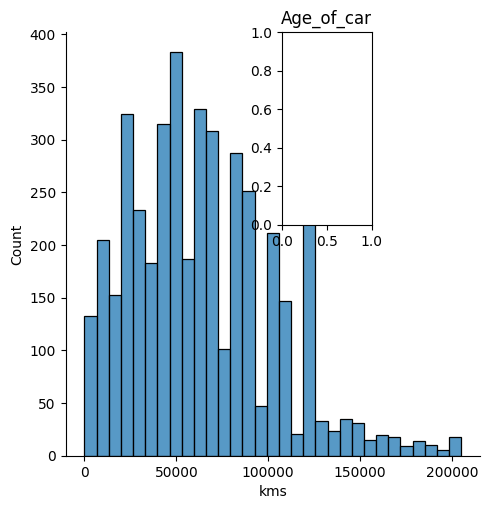

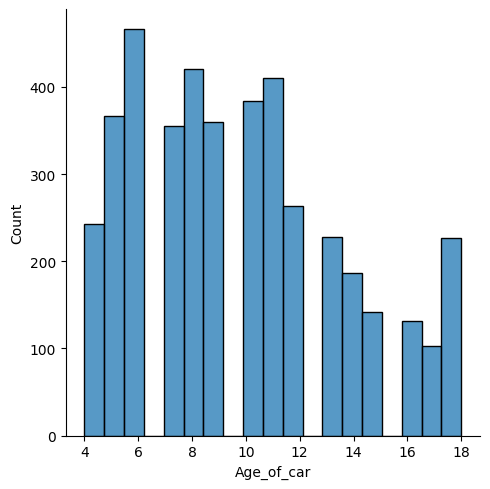

In [66]:
#plot all columns together which has numerical values using subplot of dimension
c=0
plt.figure(figsize=(20,20))
for i in num_col:
    c = c + 1
    plt.subplot(2,4,c)
    plt.title(i)
    sns.displot(df[i])
plt.show()    

In [67]:
df.head()

,price,kms,fuel,seller,transmission,owner,Age_of_car
0,80000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


Bar plot for Number of Cars by Brand
plt.figure(figsize=(12,10))
df.brand.value_counts().nlargest(30).plot(kind="bar", figsize=(12,6))
plt.title("Number of Car by Brands")
plt.ylabel("Number of Cars")
plt.xlabel("Brand Name")

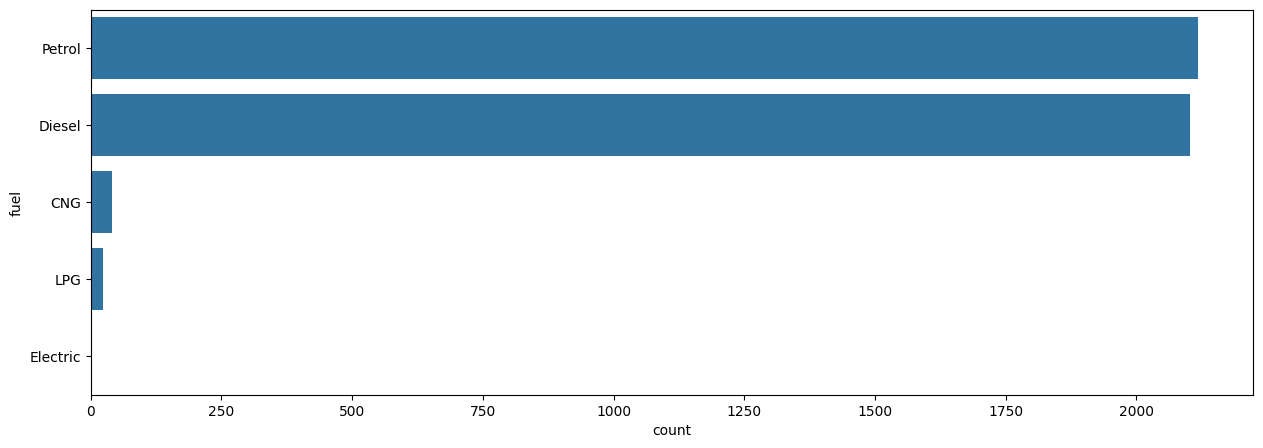

In [68]:
#countplot
plt.figure(figsize=(15,5))
sns.countplot(df["fuel"])
plt.show()

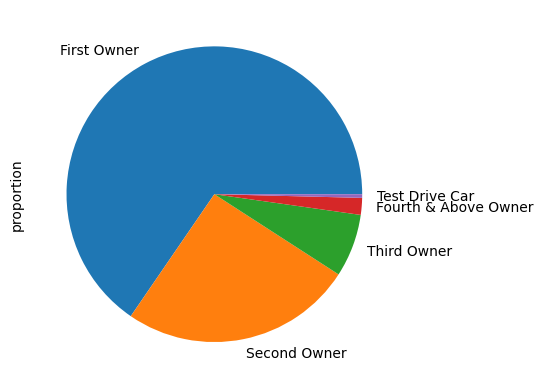

In [69]:
#pie plot
df.owner.value_counts(normalize=True).plot.pie()
plt.show()


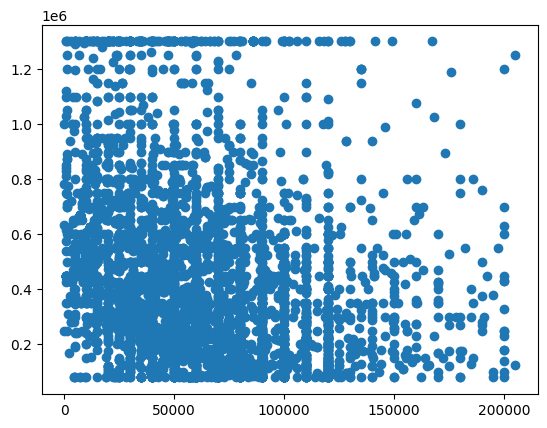

In [74]:
#scatter plot
plt.scatter(df.kms,df.price)
plt.show()

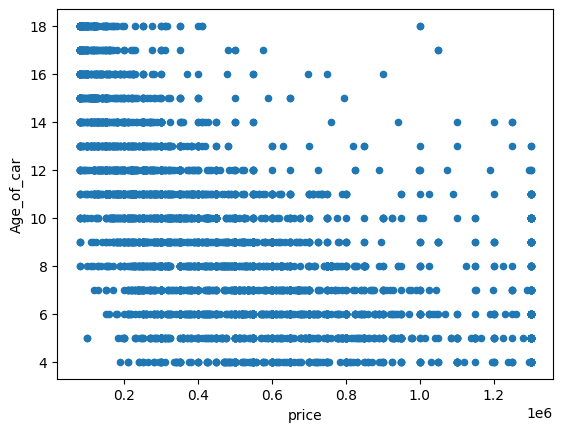

In [76]:
df.plot.scatter(x="price",y="Age_of_car")
plt.show()

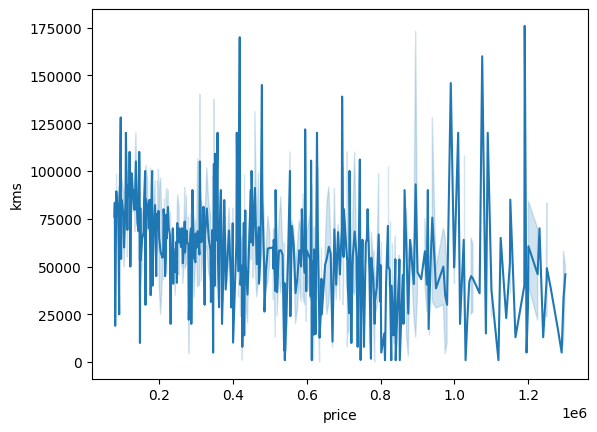

In [77]:
#line plot
sns.lineplot(x="price",y="kms",data=df)
plt.show()

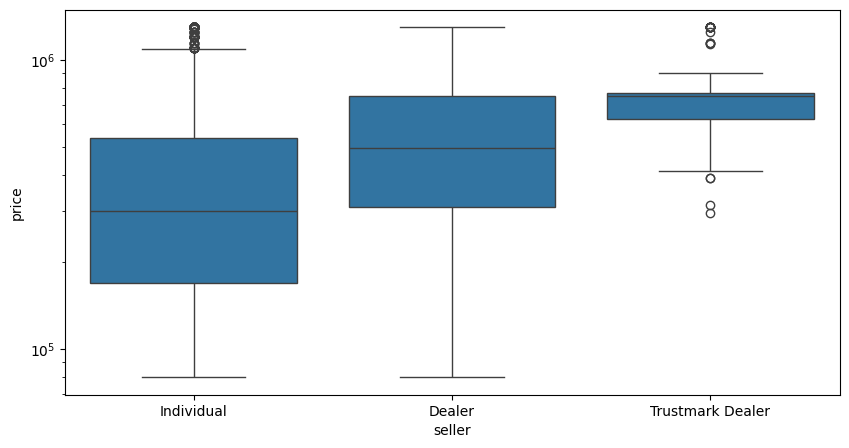

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x="seller",y="price",data=df)
plt.yscale("log")
plt.show()

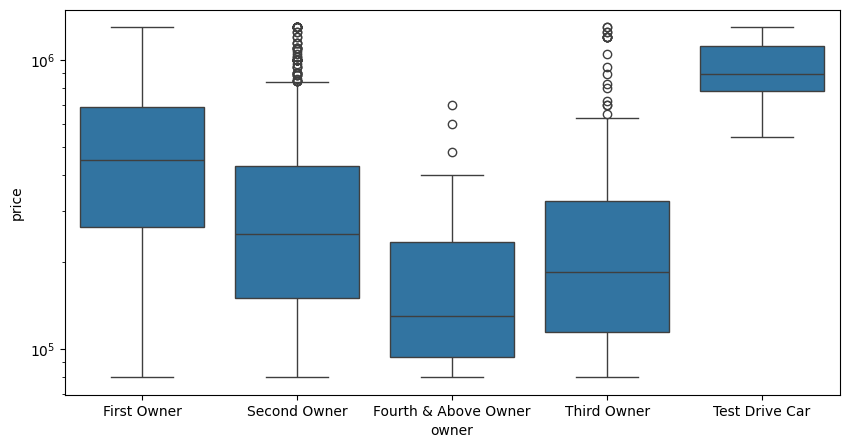

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x="owner",y="price",data=df)
plt.yscale("log")
plt.show()

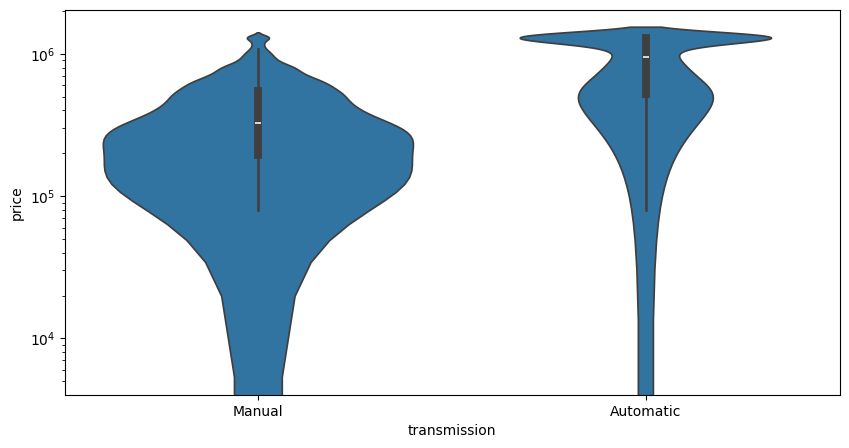

In [80]:
#violinplot
plt.figure(figsize=(10,5))
sns.violinplot(x="transmission",y="price",data=df)
plt.yscale("log")
plt.show()

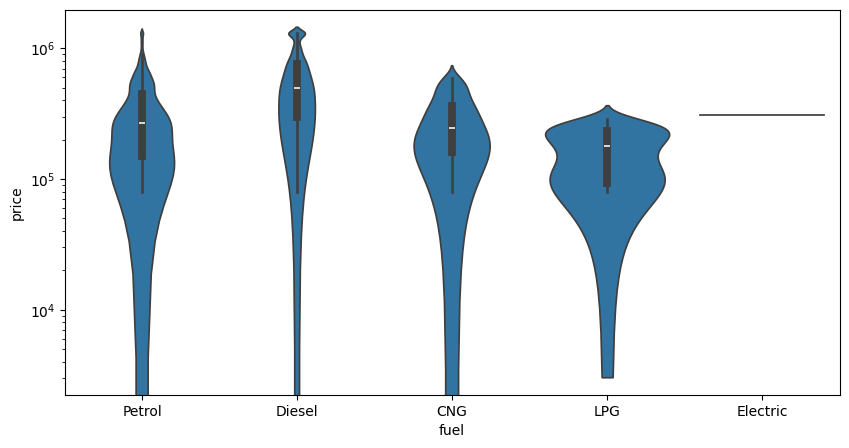

In [81]:
plt.figure(figsize=(10,5))
sns.violinplot(x="fuel",y="price",data=df)
plt.yscale("log")#keeps y as logathrimic scale
plt.show()

#joint pot : scatter and bar plot together
sns.jointplot("price","transmission",df)
plt.show()

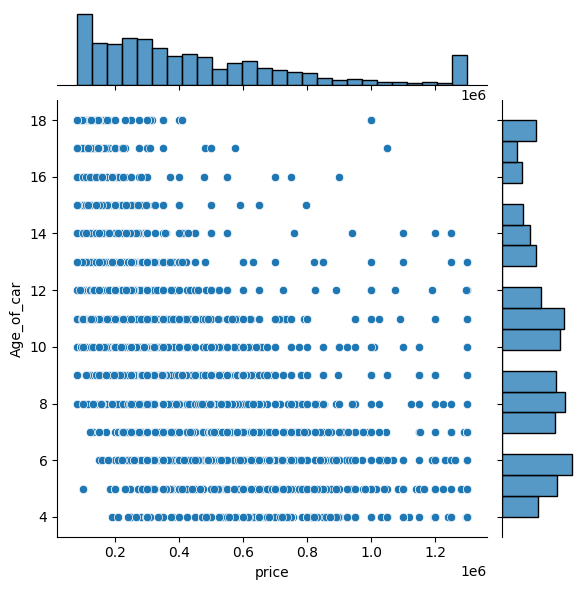

In [89]:
sns.jointplot(x="price",y="Age_of_car",data=df)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


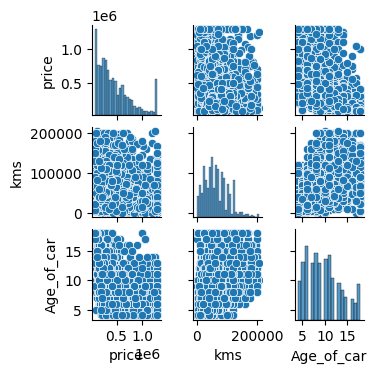

In [90]:
#pairplot
sns.pairplot(df,size=1.25)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


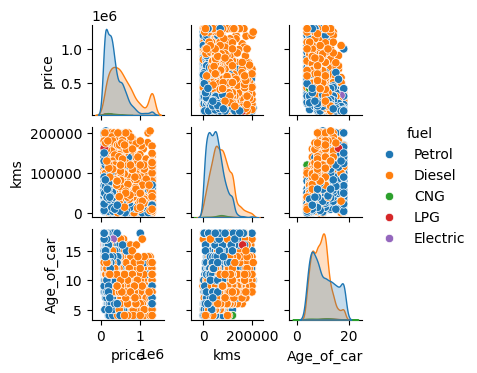

In [91]:
sns.pairplot(df,hue="fuel",size=1.25)

In [96]:
#sns.scatterplot(df.price,df.transmission,hue=df.seller) - multivariate scatterplot 

<Axes: xlabel='fuel', ylabel='price'>

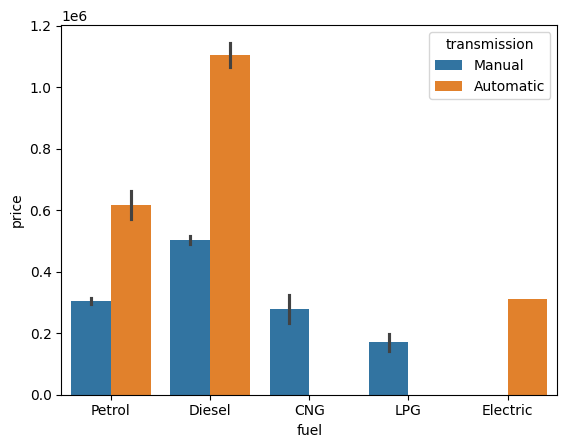

In [99]:
sns.barplot(x= df["fuel"],y= df["price"],hue= df["transmission"])

In [101]:
#heat maps
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
train_corr = df_numeric.corr()
print(train_corr)

               price       kms  Age_of_car
price       1.000000 -0.269235   -0.591399
kms        -0.269235  1.000000    0.486066
Age_of_car -0.591399  0.486066    1.000000


Text(0.5, 1.0, 'Simple Heatmap')

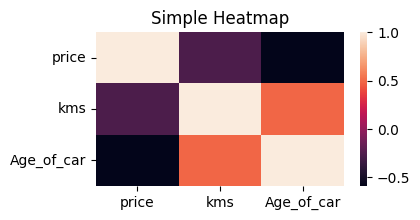

In [103]:
fig,ax=plt.subplots(figsize=(4,2))
sns.heatmap(train_corr)
ax.set_title("Simple Heatmap")

Text(0.5, 1.0, 'cmap=Accent')

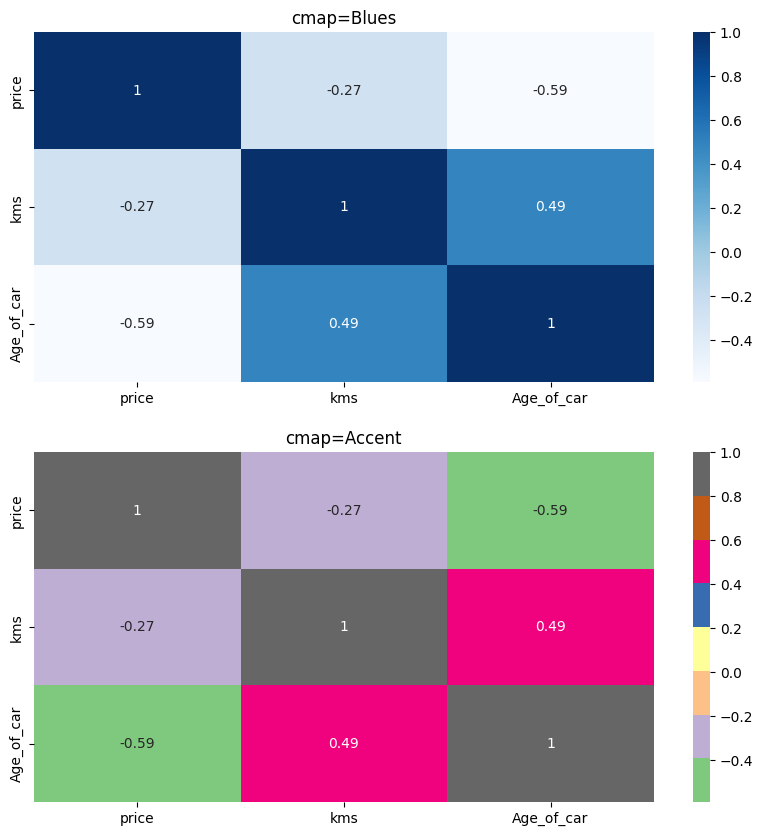

In [107]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Blues")
sns.heatmap(train_corr,annot=True,ax=ax2,cmap="Accent")
ax1.set_title("cmap=Blues")
ax2.set_title("cmap=Accent")